In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,4
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'bold'}
label_font = {'fontname':'Arial', 'size':'14', 'weight':'ultralight'}
ticks_font = {'fontname':'Arial', 'size':'12', 'weight':'ultralight'}

#### 1.Random forest.

##### 1.1.Воспользуемся данными о [сердечных заболеваниях](https://www.kaggle.com/ronitf/heart-disease-uci) и обучим на них Random Forest.
**Описание датасета:**
- **age** - возраст;
- **sex** - пол;
- **cp** - типы болей в груди (4 значения);
- **trestbps** - давление в спокойном состоянии;
- **chol** - холестерол в сыворотке крови в мг/дл;
- **fbs** - уровень сахара в крови натощак > 120 мг/дл;
- **restecg** - результаты электрокардиографии в состоянии покоя (значения **`0`**,**`1`**,**`2`**);
- **thalach** - максимальная достигнутая частота сердечных сокращений;
- **exang** - вызванная упражнениями стенокардия;
- **oldpeak** - ST-депрессия, вызванная упражнениями по сравнению с отдыхом;
- **slope** - наклон (подъем) ST-сегмента при физических упражнениях;
- **ca** - число крупных сосудов (0-3), окрашенных при флюороскопии.

##### 1.1.1.Загрузите тренировочный датасет, создайте классификатор Random Forest и обучите его с использованием данного датасета и "жадных алгоритмов".

In [3]:
heart_diseases_df = pd.read_csv('materials/heart.csv')
heart_diseases_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X_train = heart_diseases_df.drop(columns=['target'])
y_train = heart_diseases_df.target

In [5]:
random_forest_clf = RandomForestClassifier()

In [6]:
parameters = {'n_estimators':range(10,41,10), 'max_depth':range(1,12,2)}

In [7]:
grid_search_cv_clf = GridSearchCV(random_forest_clf, parameters, cv=5)

In [8]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

##### 1.1.2.Определите оптимальный, с учётом оптимизируемых параметров, классификатор. <br> <br> Определите ключевые для классификации переменные и визуализируйте эти данные.

In [9]:
best_clf = grid_search_cv_clf.best_estimator_

In [10]:
feature_importances = best_clf.feature_importances_

In [11]:
features_importance_df = pd.DataFrame({'features':list(X_train),
                                       'feature_importances':feature_importances})\
                           .sort_values(by='feature_importances')

features_importance_df

,features,feature_importances
5,fbs,0.000984
6,restecg,0.009733
4,chol,0.014227
3,trestbps,0.023007
1,sex,0.032395
0,age,0.033606
10,slope,0.068624
8,exang,0.076657
7,thalach,0.102914
9,oldpeak,0.110979


Text(0.5, 1.0, 'Top-5 major features')

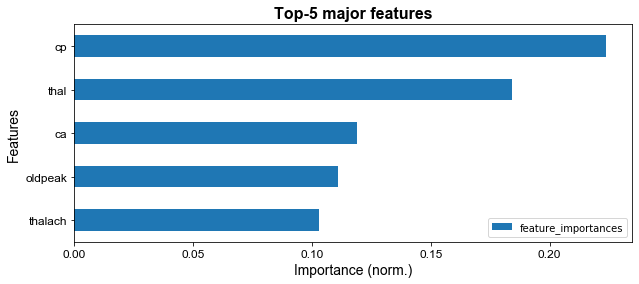

In [12]:
features_importance_df.tail(5).plot(x='features', y = 'feature_importances', kind='barh')

plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('Importance (norm.)', **label_font)
plt.ylabel('Features', **label_font)
plt.title('Top-5 major features', **title_font)

#### 2. Выполним ещё несколько упражнений для закрепления материала.

##### 2.1.Данные о съедобности грибов взяты [отсюда](https://www.kaggle.com/search). Категориальные переменные были закодированы числами.
**Описание датасета:**
- **cap-shape** - форма шляпки (**`b`** - колоколообразная, **`c`** - коническая, **`x`** - выпуклая, **`f`** - плоская, **`k`** - с выступом, **`s`** - утопленная);
- **cap-surface** - поверхность шляпки (**`f`** - волокнистая, **`g`** - с бороздами, **`y`** - чешуйчатая, **`s`** - гладкая);
- **cap-color** - цвет шляпки (**`n`** - коричневый, **`b`** - желтовато-коричневый, **`c`** - цвет корицы, **`g`** - серый, **`r`** - зеленый, **`p`** - розовый, **`u`** - фиолетовый, **`e`** - красный, **`w`** - белый, **`y`** - желтый);
- **bruises** - синяки (??) (**`t`** - есть синяки, **`f`** - нет);
- **odor** - запах (**`a`** - миндаль, **`l`** - анис, **`c`** - креозот, **`y`** - рыбный, **`f`** - неприятный, **`m`** - затхлый, **`n`** - none, **`p`** - острый, **`s`** - пряный);
- **gill-attachment** - прикрепление гимениальных пластин (**`a`** - прикреплено, **`d`** - по убыванию, **`f`** - свободное, **`n`** - зубчатый); 
- **gill-spacing** - расстояние между гимениальными пластинами (**`c`** - близко, **`w`** - плотно,**`d`** - отдаленно/умеренно);
- **gill-size** - размер гимениальной пластины (**`b`** - широкая, **`n`** - узкая);
- **gill-color** - цвет гимениальной пластины (**`k`**- черный, **`n`** - коричневый, **`b`** - желтовато-коричневый, **`h`** - шоколад, **`g`** - серый, **`r`** - зеленый, **`o`** - оранжевый, **`p`** - розовый, **`u`** - фиолетовый, **`e`** - красный, **`w`** - белый, **`y`** - желтый);
- **stalk-shape** - форма ножки (**`e`** - увеличение, **`t`** - сужение) 
- stalk-root - корень (**`b`** - луковичный, **`c`** - булава/дубинка, **`u`** -чашка, **`e`** - равномерный, **`z`** - ризоморфы, **`r`** - укоренившийся, **`?`** - отсутствующий);
- **stalk-surface-above-ring** - форма ножки над кольцом (**`f`** - волокнистый, **`y`** - чешуйчатый, **`k`** - шелковистый, **`s`** - гладкий); 
- **stalk-surface-below-ring** - поверхность ножки под кольцом (**`f`** - волокнистый, **`y`** - чешуйчатый, **`k`** - шелковистый, **`s`** - гладкий);
- **stalk-color-above-ring** - цвет ножки над кольцом (**`n`** - коричневый, **`b`** - жёлто-коричневый, **`c`** - цвет корицы, **`g`** - серый, **`o`** - оранжевый, **`p`** - розовый, **`e`** - красный, **`w`** - белый, **`y`** - желтый);
- **stalk-color-below-ring** - цвет ножки под кольцом (**`n`** - коричневый, **`b`** - жёлто-коричневый, **`c`** - цвет корицы, **`g`** - серый, **`o`** - оранжевый, **`p`** - розовый, **`e`** - красный, **`w`** - белый, **`y`** - желтый); 
- **veil-type** - тип мембраны (вуали?) (**`p`** - частичный, **`u`** - универсальный);
- **veil-color**цвет мембраны (вуали?) (**`n`** - коричневый, **`o`** - оранжевый, **`w`** - белый, **`y`** - желтый); 
- **ring-number** - число колец (**`n`** - none, **`o`** - one, **`t`** - two);
- **ring-type** - тип колец (**`c`** - паутина, **`e`**- непрозрачные, **`f`** - расширяющиеся, **`l`** - большие, **`n`** - нет, **`p`** - свисающие, **`s`** - оболочка, **`z`** - зона);
- **spore-print-color** - цвет спор (**`k`**- черный, **`n`** - коричневый, **`b`** - желтовато-коричневый, **`h`** - шоколад, **`r`** - зеленый, **`o`** - оранжевый,  **`u`** - фиолетовый, **`w`** - белый, **`y`** - желтый);
- **population** - популяция (**`a`** - обильная, **`c`** - сгруппированная, **`n`** - многочисленная, **`s`** - разбросанная, **`v`** - несколько, **`y`** - одиночная);
- **habitat** - среда обитания (**`g`** - трава, **`l`** - листья, **`m`** - луга, **`p`** - тропинки, **`u`** - города, **`w`** - отходы, **`d`** - леса). 

##### 2.1.1.Загрузите тренировочный датасет, создайте классификатор Random Forest и обучите его с использованием данного датасета и "жадных алгоритмов".

In [13]:
mushrooms_df = pd.read_csv('materials/training_mush.csv')
mushrooms_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [14]:
X_train =  mushrooms_df.drop(columns=['class'])
y_train = mushrooms_df['class']

In [15]:
rf_clf = RandomForestClassifier(random_state=0)

In [16]:
parameters = {'n_estimators':range(10,51,10),
             'max_depth':range(1,13,2),
             'min_samples_leaf':range(1,8),
             'min_samples_split':range(2,10,2)}

In [17]:
grid_search_cv_clf = GridSearchCV(rf_clf, parameters, cv=3, n_jobs=-1)

In [18]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

##### 2.1.2.Определите оптимальный, с учётом оптимизируемых параметров, классификатор. <br> <br> Определите ключевые для классификации переменные и визуализируйте эти данные.

In [19]:
# Оптимальный классификатор
best_clf = grid_search_cv_clf.best_estimator_

In [20]:
# Оптимальные параметры классификатора
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [21]:
features_importance_df = pd.DataFrame(best_clf.feature_importances_, 
                                      index=X_train.columns, 
                                      columns=['importance'])\
                           .sort_values(by='importance')

features_importance_df.head()

,importance
gill-attachment,0.000000
veil-type,0.000000
cap-shape,0.002577
cap-surface,0.003130
stalk-color-below-ring,0.006253


Text(0.5, 1.0, 'Top-5 major features')

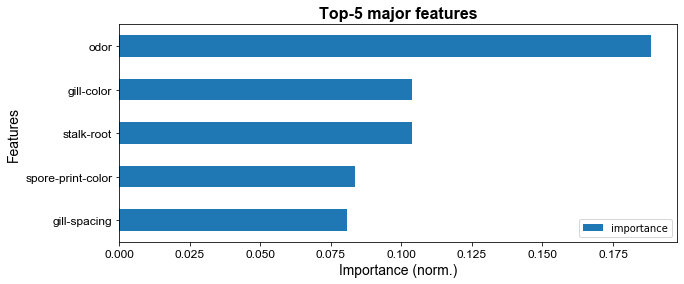

In [22]:
features_importance_df.tail(5).plot.barh()

plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('Importance (norm.)', **label_font)
plt.ylabel('Features', **label_font)
plt.title('Top-5 major features', **title_font)

##### 2.1.3. Загрузите тестовый датасет и определите с помощью созданного ранее классификатора количество съедобных грибов.

In [23]:
X_pred = pd.read_csv('materials/testing_mush.csv')

X_pred.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [24]:
# Проверка совпадает ли порядок параметров в датасетах X_train и X_pred
list(X_pred) == list(X_train.columns)

True

In [25]:
y_pred = pd.Series(best_clf.predict(X_pred))
print(f'Количество съедобных грибов: {y_pred.value_counts()[0]}')

Количество съедобных грибов: 1055


##### 2.1.4. Визуализируйте матрицу ошибок по предсказаниям, полученным вами в прошлом уроке и правильным ответам (в файле testing_y_mush.csv.zip)

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
import zipfile
z = zipfile.ZipFile('materials/testing_y_mush.csv.zip')
txtfiles = z.infolist()
password = 'Cool!Move_forward!'
y_true = pd.read_csv(z.open(txtfiles[0], "r", pwd=password.encode('cp850', 'replace')))

In [28]:
y_true.head()

,class
0,0
1,0
2,1
3,1
4,1


In [29]:
mushrooms_cm = confusion_matrix(y_true, y_pred)

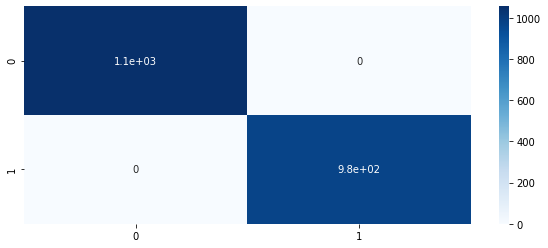

In [30]:
sns.heatmap(mushrooms_cm, annot=True, cmap="Blues")

#### 3. Оптимизация расчётов в pandas.

##### 3.1. Расставьте способы определения среднего значение в порядке убывания по скорости.

In [31]:
iris_df = pd.read_csv('materials/iris.csv')

iris_df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [32]:
%%timeit

iris_df.describe().loc['mean']

23 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
%%timeit

iris_df.apply('mean')

443 µs ± 52.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
%%timeit

iris_df.apply(np.mean)

1.98 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%%timeit

np.mean(iris_df.values)

110 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [36]:
%%timeit

iris_df.mean(axis=0)

240 µs ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


``` python
# 1) (самая быстрая команда)
np.mean(iris_df.values)

# 2)
iris_df.mean(axis=0);

# 3)
iris_df.apply('mean');

# 4)
iris_df.apply(np.mean)

# 5) (самая медленная команда)
iris_df.describe().loc['mean']
```

##### 3.2.Работа с временными рядами.

In [37]:
from datetime import datetime

##### 3.2.1. Создадим тренировочный датасет

In [38]:
# Создаем временной ряд в заданном диапазоне с шагом в 1 день
indexes = pd.date_range(start = datetime.strptime('2010-10-01','%Y-%m-%d'), 
                        end = datetime.strptime('2015-10-01','%Y-%m-%d'),
                        freq = 'D')

# Количество птиц, улетевших на зимовку
birds = np.random.randint(0, 500, (len(indexes),1))

wintering = pd.DataFrame(data=birds, index=indexes, columns=['birds_number'])

wintering.head()

,birds_number
2010-10-01,325
2010-10-02,360
2010-10-03,374
2010-10-04,81
2010-10-05,455


##### 3.2.2. Выполним фильтрацию данных:
- Отфильтруем данные за период с января 2011 до января 2014.
- Отфильтруем данные с указанной частотой по времени (к примеру 1 неделя) без осреднения.
- Отфильтруем данных за заданный период с осреднением данных (к примеру за 1 неделю).

In [39]:
# Отфильтруем данные за период с января 2011 до января 2014
wintering['2011-01':'2014-01'].head()

,birds_number
2011-01-01,105
2011-01-02,200
2011-01-03,375
2011-01-04,439
2011-01-05,227


In [40]:
# Отфильтруем данные с указанной частотой по времени (1 неделя).
wintering['2011-01':'2014-01'].resample('W').asfreq().head()

,birds_number
2011-01-02,200.0
2011-01-09,177.0
2011-01-16,213.0
2011-01-23,416.0
2011-01-30,170.0


In [41]:
# Выполним фильтрацию данных за заданный период с осреднением данных за 1 неделю.
wintering['2011-01':'2014-01'].resample('W').mean().head()

,birds_number
2011-01-02,152.500000
2011-01-09,217.571429
2011-01-16,266.714286
2011-01-23,309.285714
2011-01-30,199.142857


In [42]:
# Отфильтруем данные за период с января по март 2011 года.
# Запишем эти данные в переменную sub_df.
sub_df = wintering['2011-01':'2011-03']
sub_df.head()

,birds_number
2011-01-01,105
2011-01-02,200
2011-01-03,375
2011-01-04,439
2011-01-05,227


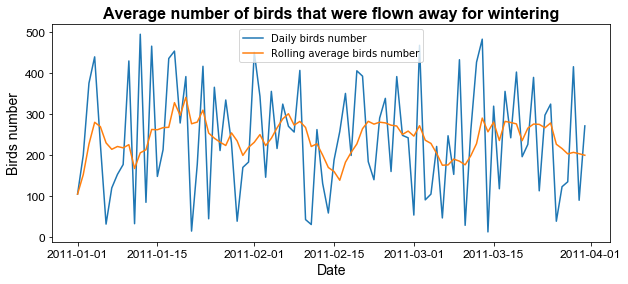

In [43]:
# Рассмотрим применение оконных операций (к примеру определение осреднённого значения в какой-то момент времени 
# с учётом текущих данных и (n-1) предыдущих).
# Такой подход используется для сглаживания графиков на базе временных рядов.
ns = sub_df.rolling(7, min_periods=1).mean()
plt.plot(sub_df)
plt.plot(ns)

plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('Date', **label_font)
plt.ylabel('Birds number', **label_font)
plt.title('Average number of birds that were flown away for wintering', **title_font)
plt.legend(['Daily birds number', 'Rolling average birds number'])

In [44]:
# Применение оконных операций (к примеру определение осреднённого значения с учётом всех предыдущих).
# Например может быть выполнено суммирование с нарастающим итогом.
sub_df.expanding().sum().head()

,birds_number
2011-01-01,105.0
2011-01-02,305.0
2011-01-03,680.0
2011-01-04,1119.0
2011-01-05,1346.0


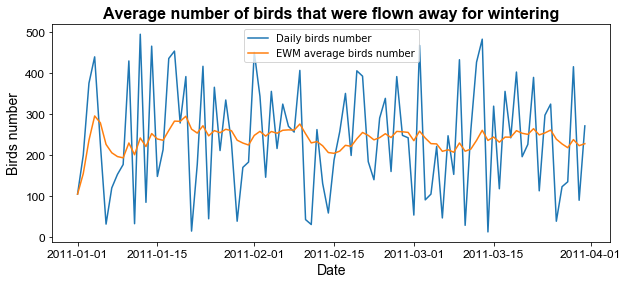

In [45]:
# Экспоненциально-взвешенное окно (экспоненциально-взвешенное скользящее среднее).
# Может быть применено, к примеру, для определения осреднённого значения с учётом всех предыдущих, с убывающим по 
# экспоненте весовым коэффициентом.
ns_1 = sub_df.ewm(alpha=0.1).mean()

plt.plot(sub_df)
plt.plot(ns_1)

plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.xlabel('Date', **label_font)
plt.ylabel('Birds number', **label_font)
plt.title('Average number of birds that were flown away for wintering', **title_font)
plt.legend(['Daily birds number', 'EWM average birds number'])

In [46]:
# Рассмотрим как можно получать информацию о конкретных днях и датах (через атрибуты временных рядов).
# День недели у каждого индекса, записанного в формате datetime
sub_df.index.dayofweek

Int64Index([5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
            6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
            0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
            1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            2, 3],
           dtype='int64')

In [47]:
# День в году каждого у индекса, записанного в формате datetime
sub_df.index.dayofyear

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86, 87, 88, 89, 90],
           dtype='int64')

In [48]:
# Номер недели в году у каждого индекса, записанного в формате datetime
sub_df.index.weekofyear

Int64Index([52, 52,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  3,
             3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
             5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
             8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10,
            10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
            12, 13, 13, 13, 13],
           dtype='int64')

In [49]:
# День недели у каждого индекса, записанного в формате datetime
sub_df.index.weekday

Int64Index([5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
            6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
            0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
            1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            2, 3],
           dtype='int64')